In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("C://Users//cleaned_data.csv")

In [9]:
df.head()

id   Age  gender  height  weight  bp_high   bp_lo  cholesterol  gluc  \
0  0.0  50.0     2.0   168.0    62.0     110.0   80.0          1.0   1.0   
1  1.0  55.0     1.0   156.0    85.0     140.0   90.0          3.0   1.0   
2  2.0  52.0     1.0   165.0    64.0     130.0   70.0          3.0   1.0   
3  3.0  48.0     2.0   169.0    82.0     150.0  100.0          1.0   1.0   
4  4.0  48.0     1.0   156.0    56.0     100.0   60.0          1.0   1.0   

   diabetic  smoke  alco  active  cardio  
0       1.0    0.0   0.0     1.0     0.0  
1       3.0    0.0   0.0     1.0     1.0  
2       3.0    0.0   0.0     0.0     1.0  
3       1.0    0.0   0.0     1.0     1.0  
4       1.0    0.0   0.0     0.0     0.0

In [10]:
df.isnull().sum()

id              260
Age             260
gender          260
height          260
weight          260
bp_high         260
bp_lo          1374
cholesterol     260
gluc            260
diabetic        260
smoke           260
alco            260
active          260
cardio          260
dtype: int64

In [11]:
df.shape

(70000, 14)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

id             0
Age            0
gender         0
height         0
weight         0
bp_high        0
bp_lo          0
cholesterol    0
gluc           0
diabetic       0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
# Summary statistics
df.describe()

id           Age       gender        height        weight  \
count  68626.000000  68626.000000  68626.00000  68626.000000  68626.000000   
mean   49976.536910     53.325154      1.34860    164.392067     74.112918   
std    28847.334089      6.767890      0.47653      7.994126     14.300798   
min        0.000000     30.000000      1.00000     91.000000     30.000000   
25%    24998.500000     48.000000      1.00000    159.000000     65.000000   
50%    50019.500000     54.000000      1.00000    165.000000     72.000000   
75%    74876.750000     58.000000      2.00000    170.000000     82.000000   
max    99999.000000     65.000000      2.00000    207.000000    200.000000   

           bp_high          bp_lo   cholesterol          gluc      diabetic  \
count  68626.000000  68626.000000  68626.000000  68626.000000  68626.000000   
mean     126.599059     81.304797      1.364425      1.225672      1.348789   
std       16.634389      9.355849      0.678723      0.571605      0.713802   
min       70.000000     50.000000      1.000000      1.000000      1.000000   
25%      120.000000     80.000000      1.000000      1.000000      1.000000   
50%      120.000000     80.000000      1.000000      1.000000      1.000000   
75%      140.000000     90.000000      1.000000      1.000000      1.000000   
max      240.000000    120.000000      3.000000      3.000000      3.000000   

             smoke          alco        active        cardio  
count  68626.00000  68626.000000  68626.000000  68626.000000  
mean       0.08794      0.053405      0.803311      0.494390  
std        0.28321      0.224842      0.397498      0.499972  
min        0.00000      0.000000      0.000000      0.000000  
25%        0.00000      0.000000      1.000000      0.000000  
50%        0.00000      0.000000      1.000000      0.000000  
75%        0.00000      0.000000      1.000000      1.000000  
max        1.00000      1.000000      1.000000      1.000000

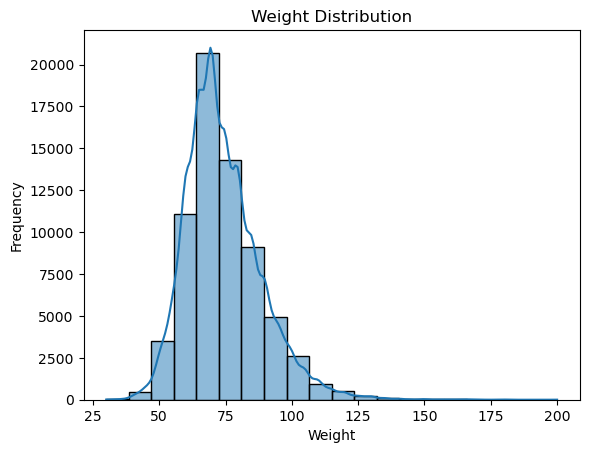

In [15]:
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Convert height from cm to meters (as BMI formula requires height in meters)
df['height_m'] = df['height'] / 100

# Calculate BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Round BMI to the nearest whole number
df['BMI'] = df['BMI'].round()

# Print the updated dataframe with BMI column
print(df[['weight', 'height', 'BMI']])

       weight  height   BMI
0        62.0   168.0  22.0
1        85.0   156.0  35.0
2        64.0   165.0  24.0
3        82.0   169.0  29.0
4        56.0   156.0  23.0
...       ...     ...   ...
69735    76.0   168.0  27.0
69736   126.0   158.0  50.0
69737   105.0   183.0  31.0
69738    72.0   163.0  27.0
69739    72.0   170.0  25.0

[68626 rows x 3 columns]


In [17]:
correlation_matrix = df[['weight', 'height', 'BMI','cardio']].corr()

In [18]:
correlation_matrix

weight    height       BMI    cardio
weight  1.000000  0.300871  0.845892  0.179316
height  0.300871  1.000000 -0.227471 -0.012389
BMI     0.845892 -0.227471  1.000000  0.184634
cardio  0.179316 -0.012389  0.184634  1.000000

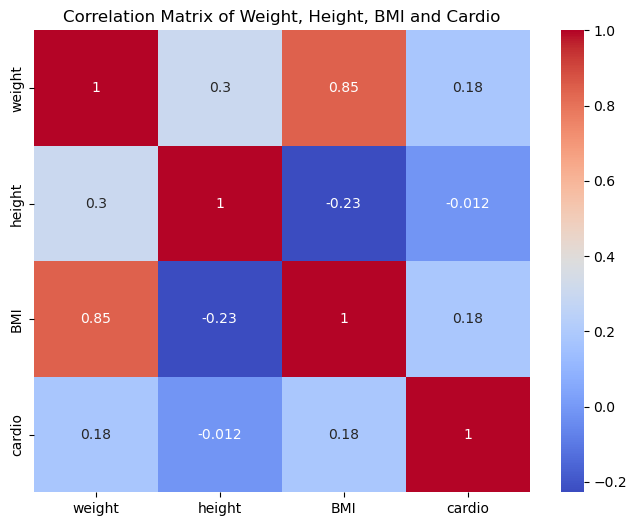

In [19]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weight, Height, BMI and Cardio')
plt.show()

In [20]:
df.head()

id   Age  gender  height  weight  bp_high   bp_lo  cholesterol  gluc  \
0  0.0  50.0     2.0   168.0    62.0     110.0   80.0          1.0   1.0   
1  1.0  55.0     1.0   156.0    85.0     140.0   90.0          3.0   1.0   
2  2.0  52.0     1.0   165.0    64.0     130.0   70.0          3.0   1.0   
3  3.0  48.0     2.0   169.0    82.0     150.0  100.0          1.0   1.0   
4  4.0  48.0     1.0   156.0    56.0     100.0   60.0          1.0   1.0   

   diabetic  smoke  alco  active  cardio  height_m   BMI  
0       1.0    0.0   0.0     1.0     0.0      1.68  22.0  
1       3.0    0.0   0.0     1.0     1.0      1.56  35.0  
2       3.0    0.0   0.0     0.0     1.0      1.65  24.0  
3       1.0    0.0   0.0     1.0     1.0      1.69  29.0  
4       1.0    0.0   0.0     0.0     0.0      1.56  23.0

In [21]:
df.to_csv('data_update.csv', index=False)